In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

x1 = np.random.uniform(1, 3, 1000)
x2 = np.random.uniform(1, 3, 1000)
x3 = np.random.uniform(1, 3, 1000)
x4 = np.random.uniform(1, 3, 1000)
x5 = np.random.uniform(1, 3, 1000)
y = (x1 + x2) / x3 + x4 * x5

In [2]:
import pandas as pd

df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'y': y})
df.head()

,x1,x2,x3,x4,x5,y
0,2.616115,2.906734,2.640457,2.786982,1.014372,4.918663
1,2.110752,1.206563,1.085901,2.443825,1.905983,7.712784
2,1.403200,2.721065,2.511220,1.803736,2.108069,5.444735
3,1.558273,2.551499,1.029929,1.493343,1.452425,6.159314
4,1.441842,1.614331,2.699161,2.674722,2.359319,7.442791


In [3]:
# Split the data into training / test sets (training set - 70% of all available data).
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[['x1', 'x2', 'x3', 'x4', 'x5']], df['y'],
    test_size=0.3,
    random_state=0
)

In [4]:
# Create a neural network with one hidden layer consisting of two neurons using Keras. Train it on the training dataset. Set the maximum number of epochs to 50.
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(2, input_dim=5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, verbose=0)

In [5]:
# Print the approximate values of the function and network prediction for the test sample, as well as the network error on the test sample.
print('y = (x1 + x2) / x3  + x4 * x5')
print('y_pred =', model.predict([[1.5, 2.5, 1.5, 1.5, 1.5]]))
print('y_test =', y_test.iloc[0])
print('error =', np.abs(model.predict([[1.5, 2.5, 1.5, 1.5, 1.5]]) - y_test.iloc[0]))

y = (x1 + x2) / x3  + x4 * x5
y_pred = [[4.521425]]
y_test = 5.516971207681115
error = [[0.99554634]]


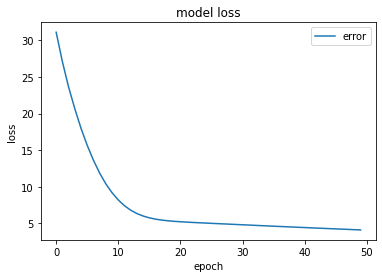

In [6]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['error'], loc='best')
plt.show()

In [7]:
# Estimate the recommended number of hidden neurons in the problem of the considered class. Create a new network with this number of hidden neurons
# and train it on the training dataset. Set the maximum number of epochs to 50.
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

param_grid = {'hidden_layer_sizes': [(2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,)]}
grid = GridSearchCV(MLPRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
print('Best parameters found on training set:', grid.best_params_)
print('Best score:', grid.best_score_)

Best parameters found on training set: {'hidden_layer_sizes': (10,)}
Best score: -1.2100789183813052


In [8]:
model = Sequential()
model.add(Dense(8, input_dim=5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, verbose=0)

In [9]:
# Print the approximate values of the function and network prediction for the test sample, as well as the network error on the test sample.
print('y = (x1 + x2) / x3  + x4 * x5')
print('y_pred =', model.predict([[1.5, 2.5, 1.5, 1.5, 1.5]]))
print('y_test =', y_test.iloc[0])
print('error =', np.abs(model.predict([[1.5, 2.5, 1.5, 1.5, 1.5]]) - y_test.iloc[0]))

y = (x1 + x2) / x3  + x4 * x5
y_pred = [[5.2767673]]
y_test = 5.516971207681115
error = [[0.24020386]]


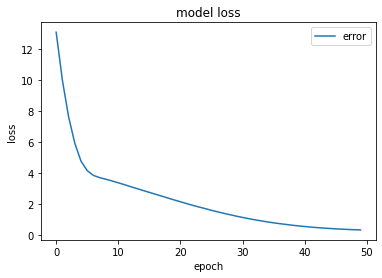

In [10]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['error'], loc='best')
plt.show()

In [11]:
x1 = np.random.uniform(1, 3, 1000) / 0.2
x2 = np.random.uniform(1, 3, 1000) / 0.2
x3 = np.random.uniform(1, 3, 1000) / 0.2
x4 = np.random.uniform(1, 3, 1000) / 0.2
x5 = np.random.uniform(1, 3, 1000) / 0.2
y = (x1 + x2) / x3 + x4 * x5

df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'y': y})
df.head()

,x1,x2,x3,x4,x5,y
0,11.881594,7.378977,8.695862,13.899884,11.187551,157.720570
1,10.166374,12.911713,7.895523,8.518656,9.804944,86.447882
2,12.053478,8.875603,9.357089,11.090021,6.815897,77.825153
3,14.448772,6.412561,9.677076,8.514554,6.670476,58.951878
4,10.276639,12.895458,6.297303,9.584599,7.202319,72.711023


In [12]:
# Split the data into training / test sets (training set - 70% of all available data).
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[['x1', 'x2', 'x3', 'x4', 'x5']], df['y'],
    test_size=0.3,
    random_state=0
)

In [13]:
model = Sequential()
model.add(Dense(8, input_dim=5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, verbose=0)

In [14]:
# Print the approximate values of the function and network prediction for the test sample, as well as the network error on the test sample.
print('y = (x1 + x2) / x3  + x4 * x5')
print('y_pred =', model.predict([[1.5, 2.5, 1.5, 1.5, 1.5]]))
print('y_test =', y_test.iloc[0])
print('error =', np.abs(model.predict([[1.5, 2.5, 1.5, 1.5, 1.5]]) - y_test.iloc[0]))

y = (x1 + x2) / x3  + x4 * x5
y_pred = [[19.539198]]
y_test = 36.15937415993369
error = [[16.620176]]


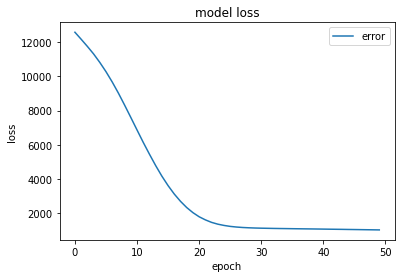

In [15]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['error'], loc='best')
plt.show()